# Earthquake Prediction

## Introduction

An earthquake is what happens when two blocks of the earth suddenly slip past one another. The surface where they slip is called the fault or fault plane. The location below the earth’s surface where the earthquake starts is called the hypocenter, and the location directly above it on the surface of the earth is called the epicenter.

On March 27, 1964, at 5:36 pm an earthquake of magnitude 9.2 occurred in Alaska. The depth of Alaska's (64) earthquake was  25 km beneath the surface. The earthquake lasted approximately 4.5 minutes. It was followed by multiple Tsunamis recorded as high as 67 meters. It still holds the title of the most powerful recorded earthquake in the history of the United States. It is also the second-largest earthquake ever recorded, next to the M9.5 earthquake in Chile in 1960. This catastrophic event was a  great leap forward to the modern age of earthquake science. Most of what we know about earthquakes can be traced back to the geological research done after the great Alaskan earthquake.

# Business understanding
In February 6th, 2023, Turkey was struck by a devastating earthquake that was strongly felt in the southern and central parts of Turkey, the northern and western parts of Syria with mild yet deadly shaking in Cyprus, Israel, and Lebanon. In Turkey alone, there was widespread damage of property and loss of life with a death toll of more than 55,000 people. Further, more than 130,000 people were left injured and millions were displaced from their homes. With a magnitude of 7.8, the earthquake's impact was greatly felt on infrastructure with destructions amounting to billions of dollars. 
An earthquake of such magnitude is a reminder of the need to be prepared in terms of forecasting earthquakes and the magnitude to be expected. Therefore, our project aims to enhance earthquake prediction and analysis to mitigate the impact of these natural disasters. By improving the accuracy of the earthquake prediction model through advanced time series forecasting techniques and optimizing model parameters, the project seeks to provide reliable warnings and timely information. Additionally, comprehensive analysis of earthquake patterns, including factors such as magnitude, depth, and time of occurrence, will enable the identification of significant trends and correlations. The project aims to provide actionable insights for improving earthquake preparedness and risk assessment, ultimately saving lives and minimizing damage.

### Problem statement
Earthquakes pose a significant threat to human lives, infrastructure, and the environment. Timely and accurate prediction of earthquake occurrences can greatly assist in mitigating the impact of these natural disasters. However, predicting earthquakes with high precision remains a challenging task due to the complex nature of seismic events and the limited understanding of the underlying processes.


### Objectives 

1* To show the impact of earthquakes in terms of magnitude.

2* To forecast the occurrence and magnitude of future earthquakes.

3* Explore various factors, including geographic location, magnitude, depth, and time of occurrence.

4* Conduct statistical analysis and data visualization to identify significant trends and correlations.



 

## Success Metrics
Root Mean Squared Error (RMSE): The goal is to achieve a lower RMSE value, indicating better accuracy of our models.



# Data understanding
Here we need to deeply look into the data and understand it as much as possible . This includes getting the data info, getting description of the data, checking for missing data and duplicates

In [351]:
#the libraries required
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pandas as pd
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from prophet import Prophet
from sklearn.preprocessing import StandardScaler

A pre-view of the data

In [352]:
data= pd.read_csv('database.csv')
data.head()
data_2 = data.copy()
data

Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square            ID  Source  \
0                   NaN               NaN  ISCGEM860706  ISCGEM   
1                   NaN               NaN  ISCGEM860737  ISCGEM   
2                   NaN               NaN  ISCGEM860762  ISCGEM   
3                   NaN               NaN  ISCGEM860856  ISCGEM   
4                   NaN               NaN  ISCGEM860890  ISCGEM   
...                 ...               ...           ...     ...   
23407               NaN            0.1898    NN00570710      NN   
23408               NaN            0.2187    NN00570744      NN   
23409               4.8            1.5200    US10007NAF      US   
23410               6.0            1.4300    US10007NL0      US   
23411               4.5            0.9100    US10007NTD      US   

      Location Source Magnitude Source     Status  
0              ISCGEM           ISCGEM  Automatic  
1              ISCGEM           ISCGEM  Automatic  
2              ISCGEM           ISCGEM  Automatic  
3              ISCGEM           ISCGEM  Automatic  
4              ISCGEM           ISCGEM  Automatic  
...               ...              ...        ...  
23407              NN               NN   Reviewed  
23408              NN               NN   Reviewed  
23409              US               US   Reviewed  
23410              US

The columns available and the column dictionary

In [353]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

#### columns and what they entail

* Date: The date of the earthquake event.
* 
* Time: The time of day when the earthquake occurred.
* 
* Latitude: The geographic latitude coordinate of the earthquake's epicenter.
* 
* Longitude: The geographic longitude coordinate of the earthquake's epicenter.
* 
* Type: The type or classification of the earthquake, such as "earthquake," "explosion," or "rockslide."
* 
* Depth: The depth at which the earthquake occurred below the Earth's surface.
* 
* Depth Error: The error or uncertainty associated with the reported depth value.
* 
* Depth Seismic Stations: The number of seismic stations used to determine the earthquake's depth.
* 
* Magnitude: The magnitude of the earthquake, which represents the energy released during the event.
* 
* Magnitude Type: The type of magnitude scale used to measure the earthquake, such as "mb" (body wave magnitude) or "ml" (local magnitude).
* 
* Magnitude Error: The error or uncertainty associated with the reported magnitude value.
* 
* Magnitude Seismic Stations: The number of seismic stations used to determine the earthquake's magnitude.
* 
* Azimuthal Gap: The angular gap between azimuthally adjacent stations used to locate the earthquake.
* 
* Horizontal Distance: The horizontal distance between the earthquake's epicenter and a reference point.
* 
* Horizontal Error: The error or uncertainty associated with the reported horizontal distance.
* 
* Root Mean Square: The root mean square value of the residual (the difference between the observed and calculated seismic data) used in determining the earthquake's location and magnitude.
* 
* ID: An identifier or unique code assigned to each earthquake event.
* 
* Source: The source or agency that reported the earthquake data.
* 
* Location Source: The source or agency responsible for providing the location information of the earthquake.
* 
* Magnitude Source: The source or agency responsible for providing the magnitude information of the earthquake.
* 
* Status: The status or validity of the earthquake event, indicating whether it is reviewed, reviewed and revised, or automatic.

#### Data understanding functions

here, we get the data info , describe the data and check for the missing values of the data

function to check data info

In [354]:
def data_info(data):
    """Prints information about the data"""
    out = print(data.info(), '\n')
    
    return out


Function to describe data

In [355]:
def data_describe(data):
    """To check the discriptive values of the"""
    out = print(data.describe(), '\n')
    
    return out


Here, we check for null values using a function

In [356]:
def null_vals(data):
  null= print (data.isnull().sum(),'/n')
  return null



checking for duplicates

In [357]:
data.duplicated().any()

False

In [358]:
#describing data
data_describe (data)

           Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.70

In [359]:
#checking info
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [360]:
#checking for missing values
null_vals(data)

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64 /n


# data cleaning

The dates and time of three Rows were wrongly formatted , We first locate and fix them

In [361]:
date_lengths=data.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [362]:
#checking the rows with wrongly formatted date and time
invalid_format=np.where([date_lengths==24])[1]
data.loc[invalid_format]

Date                      Time  Latitude  \
3378   1975-02-23T02:58:41.000Z  1975-02-23T02:58:41.000Z     8.017   
7512   1985-04-28T02:53:41.530Z  1985-04-28T02:53:41.530Z   -32.998   
20650  2011-03-13T02:23:34.520Z  2011-03-13T02:23:34.520Z    36.344   

       Longitude        Type  Depth  Depth Error  Depth Seismic Stations  \
3378     124.075  Earthquake  623.0          NaN                     NaN   
7512     -71.766  Earthquake   33.0          NaN                     NaN   
20650    142.344  Earthquake   10.1         13.9                   289.0   

       Magnitude Magnitude Type  ...  Magnitude Seismic Stations  \
3378         5.6             MB  ...                         NaN   
7512         5.6             MW  ...                         NaN   
20650        5.8            MWC  ...                         NaN   

       Azimuthal Gap  Horizontal Distance  Horizontal Error  Root Mean Square  \
3378             NaN                  NaN               NaN               NaN   
7512             NaN                  NaN               NaN              1.30   
20650           32.3                  NaN               NaN              1.06   

               ID Source Location Source Magnitude Source    Status  
3378   USP0000A09     US              US               US  Reviewed  
7512   USP0002E81     US              US              HRV  Reviewed  
20650  USP000HWQP     US              US             GCMT  Reviewed  

[3 rows x 21 columns]

Correctly formatting the dates and times that were wrongly formatted

In [363]:
data.loc[3378,'Date']= '02/23/1975'
data.loc[7512,'Date']= '02/23/1975'
data.loc[20650,'Date']= '02/23/1975'
data.loc[3378,'Time']= '02:58:41'
data.loc[7512,'Time']= '02:53:41'
data.loc[20650,'Time']= '02:23:34'

Here we changed the date and time dtypes to DateTime, we then combined them and set the result as index

In [364]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data = data.drop(['Date', 'Time'], axis=1)
data = data.set_index('DateTime')

We drop the columns that had a very large missing values 

In [365]:
columns_drop = ['Depth Error','Magnitude Error','Magnitude Seismic Stations','Horizontal Error','Root Mean Square','Horizontal Distance','Depth Seismic Stations', 'Azimuthal Gap']
data= data.drop(columns_drop,axis=1)


# Exploratory Data Analysis

Here we are looking at various univariate analysis and bivariate analysis . The section entail trend analysis,seasonal patterns and event clustering.


A plot of earthquakes per years

Plotting hist_plots of various columns

function to plot hist_plot

In [366]:
def hist_plot(column):
    """
    Creates a countplot to visualize the distribution of values in a categorical column of a DataFrame.

    Parameters:
        column (str): The name of the column from the DataFrame to plot.

    Returns:
        None
    """
    sns.set_style("whitegrid") 
    plt.figure(figsize=(5, 3))
    sns.countplot(data=data, y=data[column])
    plt.title(f'{(column)} Countplot')
    plt.show(); 
         

Hist_plot of magnitude type

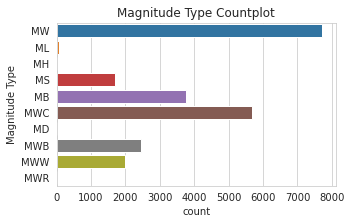

In [367]:

hist_plot('Magnitude Type')    

Hist_plot of type

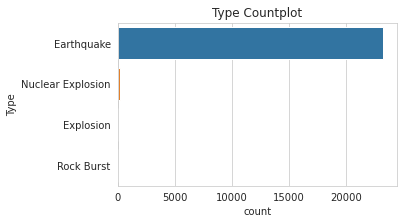

In [368]:
hist_plot('Type')

Hist_plot of status

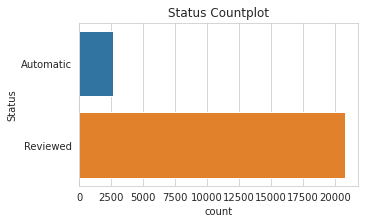

In [369]:
hist_plot('Status')

Below we plot  a map showing all the areas that have been affected by earthquakes

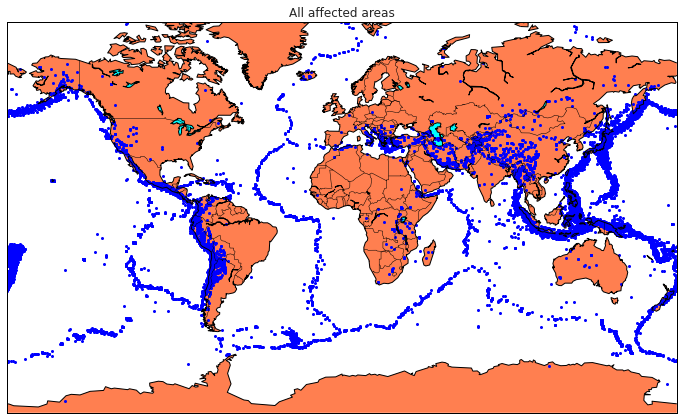

In [370]:
#!pip install basemap
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

we also plot a mapbox that shows the longitude,Latitude and magnitude of the affected areas

In [371]:
fig = px.scatter_mapbox(
    data,  # Our DataFrame
    lat='Latitude',
    lon='Longitude',
    width=600,  # Width of map
    height=600,  # Height of map
    color='Magnitude',
    hover_data=["Magnitude"],  
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()


## Magnitude by decade

We plot a trend analysis of Magnitude for different decades 

In [372]:
#creating a new column of decades
data['Decades'] = data.index.year // 10 * 10

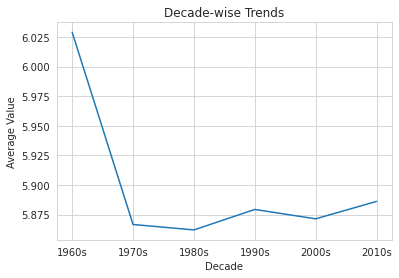

In [373]:
#Plotting the trend analysis for the different decades
decade_data = data.groupby('Decades')['Magnitude'].mean()

plt.plot(decade_data.index, decade_data.values)
plt.xlabel('Decade')
plt.ylabel('Average Value')
plt.title('Decade-wise Trends')
plt.xticks(decade_data.index, [str(decade) + 's' for decade in decade_data.index])
plt.show()

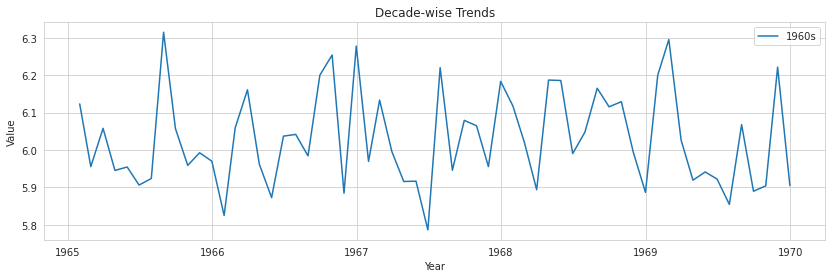

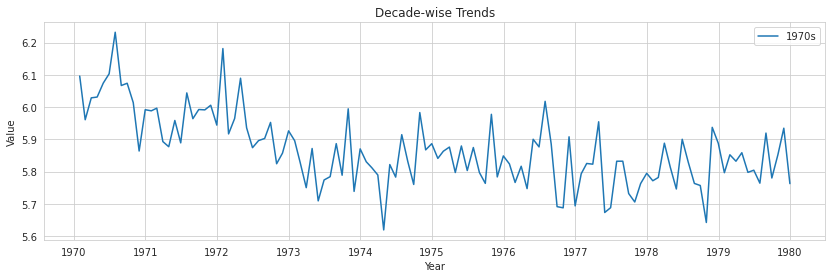

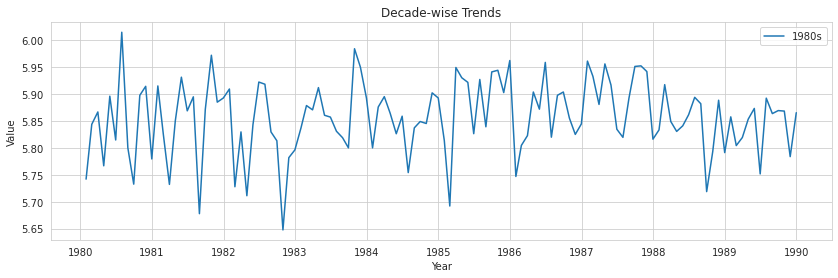

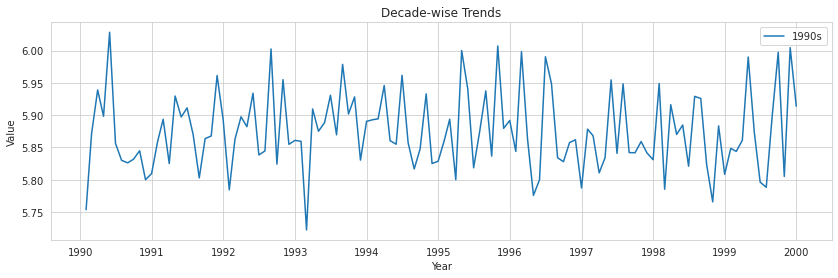

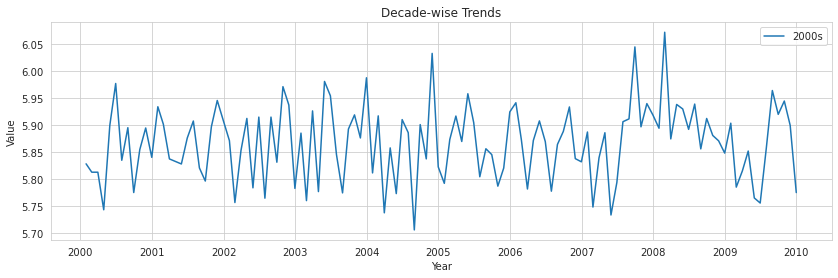

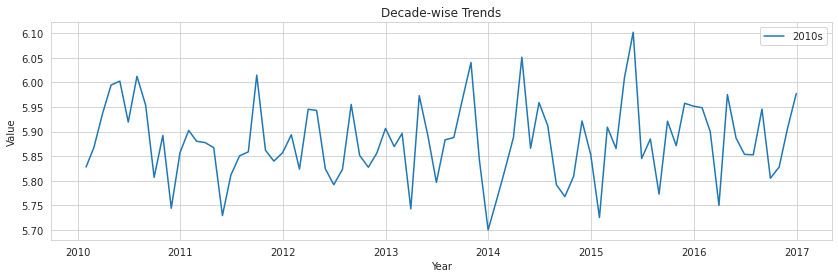

In [374]:
last_two_decades = []
last_two_decades_data = []

#Creating separate trends for every decade
decade_data_i = data.groupby('Decades')['Magnitude']

for decade, data_i in decade_data_i:

    #resampling to monthly frequency
    monthly_data = data_i.resample('M').mean()

    plt.figure(figsize=(14, 4))

    plt.plot(monthly_data.index, monthly_data.values, label=str(decade)+'s')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Decade-wise Trends')
    plt.legend()
    plt.show()

    # Track the last two unique decades
    last_two_decades.append(decade)
    last_two_decades = last_two_decades[-2:]

    # Store the data for the last two decades
    if decade in last_two_decades:
        last_two_decades_data.append(monthly_data)


In [375]:
# Access the last two decades from the list
last_two_decades_data = [data for decade, data in decade_data_i if decade in last_two_decades]
# Concatenate the dataframes of the last two decades
last_two_decades_data_df = pd.concat(last_two_decades_data)

# Use the last_two_decades_data_df as needed
data_n=pd.DataFrame(last_two_decades_data_df)


## Depth by decade

Next is a trend analysis of depth for the different decades

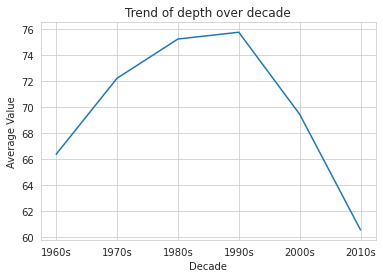

In [376]:
#Plotting the trend analysis for the different decades
decade_data_depth = data.groupby('Decades')['Depth'].mean()

plt.plot(decade_data_depth.index, decade_data_depth.values)
plt.xlabel('Decade')
plt.ylabel('Average Value')
plt.title('Trend of depth over decade')
plt.xticks(decade_data_depth.index, [str(decade) + 's' for decade in decade_data_depth.index])
plt.show()

The depth at which the earthquake occurred below the Earth's surface is at its highest from 1980's to 1990's.From then, There is a gradual drop towards 2010's


 distribution of earthquake magnitude

In [377]:
import plotly.figure_factory as ff

fig = ff.create_distplot([data['Magnitude']], ['Earthquake Magnitude'])
fig.show()

Most of the earthquake magnitudes are moderate, rangeing from 5.5 to 6.5 . Theres less occurence of the strong earhquake magnitudesPlot showing The

## Data preproccessing

#### Checking for stationarity

In [378]:
#magnitude column
mag_d= data['Magnitude'].to_frame()

In [379]:
# conduct the test 
def check_stationarity(data):
    adf_test = adfuller(data)
    adf, pvalue, critical_value = adf_test[0], adf_test[1],adf_test[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is Stationary')
        print(pvalue)
    else:
        print('The series is NOT Stationary')

check_stationarity(mag_d)        

The series is Stationary
1.285920457867336e-29


In [409]:
# Iterate over the columns to check for stationarity
for column in ['Magnitude', 'Depth']:
   
   
    # Perform the Augmented Dickey-Fuller (ADF) test
    result = adfuller(data[column])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t', key, ':', value)
    print('-----------------------------------')

Magnitude
ADF Statistic: -16.771454185659568
p-value: 1.285920457867336e-29
Critical Values:
	 1% : -3.430629918618441
	 5% : -2.861663715172587
	 10% : -2.5668358500354262
-----------------------------------
Magnitude
ADF Statistic: -71.2551859182572
p-value: 0.0
Critical Values:
	 1% : -3.4306293923979077
	 5% : -2.861663482610706
	 10% : -2.56683572624751
-----------------------------------


## Feature Engineering

First , we categorize our data into seasons

In [381]:
# Convert index to datetime format
data.index = pd.to_datetime(data.index)

# Extract the month from the index
data['Month'] = data.index.month

# Define a function to categorize the seasons based on the month
def categorize_season(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    else:  # Fall: September, October, November
        return 'Fall'

# Apply the categorize_season function to create a 'Season' column
data['Season'] = data['Month'].apply(categorize_season).to_frame()

# Print the updated DataFrame
data['Season'].value_counts()


Spring    6047
Fall      5924
Winter    5723
Summer    5718
Name: Season, dtype: int64

We then generate binary features for the type column. This shows the types as earthquake,Nuclear Explossion,Explosssion or rock Burst

In [382]:
#Function that creates binary features

def create_binary_features(data, type_column):
    # Create binary features for each earthquake type
    type_dummies = pd.get_dummies(data[type_column])
    type_columns = type_dummies.columns.tolist()

    # Add the binary features to the original DataFrame
    data[type_columns] = type_dummies

    return data

# Call the function to create binary features for earthquake types
data = create_binary_features(data, 'Type')

Here, we created a function that will classify the The depth at which the earthquake occurred below the Earth's surface as Shallow,intermediate,deep or very deep

In [383]:
#Function to proccess depth Features
def process_depth_features(data):
    # Bin the depth values into ranges
    depth_bins = [0, 10, 50, 100, float('inf')]
    depth_labels = ['Shallow', 'Intermediate', 'Deep', 'Very Deep']
    data['Depth Range'] = pd.cut(data['Depth'], bins=depth_bins, labels=depth_labels)

    return data

# Call the function to process depth features
data = process_depth_features(data)

Next we create a function that  creates a column to label magnitudes as Minor,light,Moderate or strong

In [384]:
def process_magnitude_features(data):
    # Define magnitude ranges and corresponding labels
    magnitude_bins = [0, 3, 5, 7, float('inf')]
    magnitude_labels = ['Minor', 'Light', 'Moderate', 'Strong']
    
    # Group earthquakes into magnitude ranges
    data['Magnitude Range'] = pd.cut(data['Magnitude'], bins=magnitude_bins, labels=magnitude_labels)

    # Calculate magnitude difference
    data['Magnitude Difference'] = data['Magnitude'] - data.groupby('Location Source')['Magnitude'].transform('mean')

    return data
# Call the function to process magnitude features
data = process_magnitude_features(data)



## Modelling

## Facebook Prophet Model

In [ ]:
# extract the magnitude column
df =data_n[['Magnitude']]
# reset the index
df.reset_index(inplace=True)
# renaming columns
df = df.rename(columns={ "DateTime" : "ds" , "Magnitude" : "y" })

# creating train and test sets 
test_size = 1750
train = df[:-test_size]
test = df[-test_size:]

The `DateTime` column is renamed to `ds` and the `Magnitude` column is renamed to `y`. These column names are the default conventions used by Facebook Prophet for the time series modeling. By performing these steps, we ensure that our dataset is properly prepared and structured for modeling using Facebook Prophet. This includes extracting the target variable, resetting the index, renaming columns to the required format, and creating separate train and test sets for evaluation.

In [386]:

# univariate
model = Prophet()
model.fit(train)

00:00:51 - cmdstanpy - INFO - Chain [1] start processing
00:00:55 - cmdstanpy - INFO - Chain [1] done processing


In [387]:
pred = model.predict(test)

# RMSE
from sklearn.metrics import mean_squared_error
rmse =np.sqrt(mean_squared_error(test['y'], pred['yhat']))
print(f'RMSE: {round(rmse,2)}')

RMSE: 0.45


The calculated RMSE value of 0.45 indicates that the predictions made by the Facebook Prophet model have, on average, a difference of 0.45 units from the actual values in the test set. This suggests that the model has performed well in predicting earthquake magnitudes, as the average deviation between the predicted and actual values is relatively low.

In [389]:
# Predict for the next 10 years
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Extract the desired columns
columns = ['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper'] 
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries 
forecast_extracted = forecast[columns]

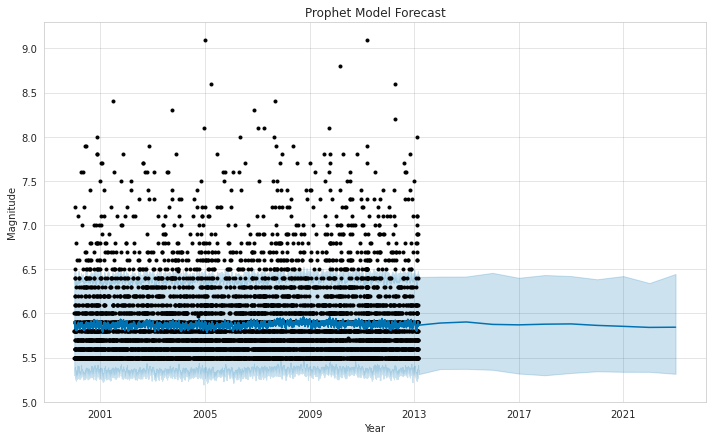

In [390]:
# Plot the forecast
model.plot(forecast_extracted)
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Prophet Model Forecast')
plt.show()

# ARMA Model

### Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

<AxesSubplot:xlabel='DateTime'>

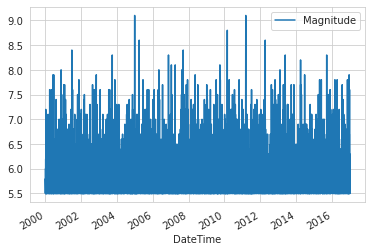

In [391]:
data_n.plot()

In [392]:
check_stationarity(data_n)  

The series is Stationary
0.0


Our dataset from 2000 - 2016 has 8742 rows.We split the data and set the test size to be 1750( that is 20%) 

In [393]:
test_size = 1750

train = data_n[:-test_size]
test = data_n[-test_size:]

The plot below shows the train and test data

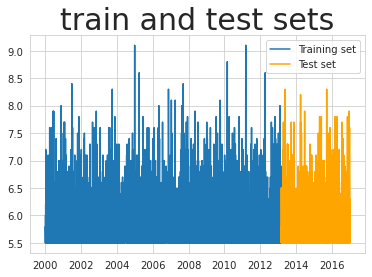

In [394]:
plt.title('train and test sets', size=30)
plt.plot(train, label='Training set')
plt.plot(test, label='Test set', color='orange')
plt.legend();

In [395]:
train_values = train['Magnitude']
test_values = test['Magnitude']

Moving Average is a method of identiying trends in historical data

Below , we calculate the rolling mean and make the moving avarage ppredictions

In [396]:
# Define the window size for the moving average

window_size = 1750
# moving average for the entire dataset
moving_avg = train_values.rolling(window=window_size).mean()

# moving average predictions for both train and test data
train_moving_avg = moving_avg[:len(train_values)]
test_moving_avg = moving_avg[len(train_values) - window_size:]

In [397]:
#The moving avarage of the test values
test_moving_avg

DateTime
2010-02-12 12:03:39    5.883074
2010-02-13 02:34:29    5.882960
2010-02-15 21:51:48    5.882903
2010-02-17 19:38:06    5.882960
2010-02-18 01:13:20    5.883703
                         ...   
2013-02-26 19:57:56    5.880011
2013-02-28 03:09:45    5.880240
2013-02-28 14:05:50    5.881040
2013-02-28 18:07:48    5.881040
2013-03-01 12:53:51    5.881554
Name: Magnitude, Length: 1750, dtype: float64

In [398]:
#predictions on the test data using the moving average
test_predictions = test_moving_avg.values

# Print the test predictions
print(test_predictions)

[5.88307429 5.88296    5.88290286 ... 5.88104    5.88104    5.88155429]


Below is a plot of the Train set and moving avarages

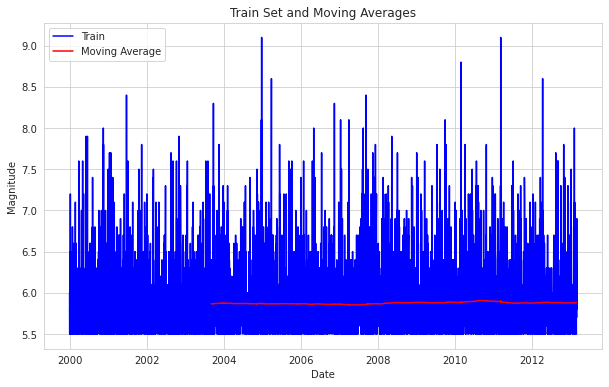

In [399]:
# Plotting the train set and moving averages
plt.figure(figsize=(10, 6))
plt.plot(train_values.index, train_values, color='blue', label='Train')
plt.plot(train_values.index, train_moving_avg, color='red', label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Train Set and Moving Averages')
plt.legend()
plt.show()

We Then calculate the Root Mean Squared Erroe(RMSE) of test values and test predictions below
an RMSE of 0.445 suggests that the model's predictions are quite close to the actual values, with relatively low error.

In [400]:
# the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(test_values, test_predictions))

# Print the RMSE
print("RMSE:", np.round(rmse,4))

RMSE: 0.4456


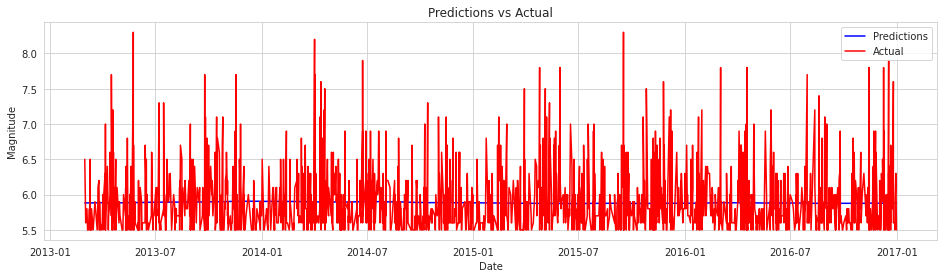

In [401]:
# Plotting the predicted values and the actual values
plt.figure(figsize=(16, 4))
plt.plot(test_values.index, test_predictions, color='blue', label='Predictions')
plt.plot(test_values.index, test_values, color='red', label='Actual')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

Here's to determine the order of p,d,q

/home/cynthiah/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



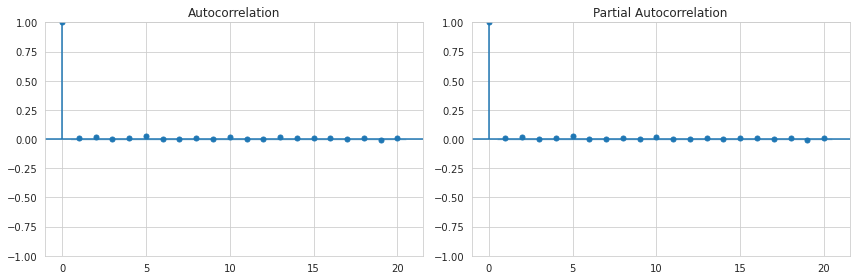

In [402]:
## Determining the values of p,d,q

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.ylim(-0.25,0.25)
plot_acf(train, lags=20, ax=axes[0], alpha=0.5)
plot_pacf(train, lags=20, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [403]:
from pmdarima import auto_arima
stepwise = auto_arima(train_values, trace= True,
          suppress_warning = True)
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7843.005, Time=11.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7837.687, Time=1.56 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7839.009, Time=0.93 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7839.031, Time=2.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=44644.905, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7840.963, Time=2.40 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 19.045 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6993
Model:                        SARIMAX   Log Likelihood               -3916.844
Date:                Thu, 22 Jun 2023   AIC                           7837.687
Time:                        00:01:46   BIC                           7851.393
Sample:                             0   HQIC                          7842.410
                               - 6993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.8734      0.007    792.844      0.000       5.859       5.888
sigma2         0.1795      0.002     80.870      0.000       0.175       0.184
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):             15446.99
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             2.06
Prob(H) (two-sided):                  0.08   Kurtosis:                         9.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Fitting our ARMA Model 

In [404]:
model= ARIMA(train.values, order=(1,0,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6993
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3911.979
Date:                Thu, 22 Jun 2023   AIC                           7831.959
Time:                        00:01:53   BIC                           7859.369
Sample:                             0   HQIC                          7841.404
                               - 6993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8734      0.010    612.412      0.000       5.855       5.892
ar.L1          0.9689      0.023     41.774      0.000       0.923       1.014
ma.L1         -0.9597      0.026    -36.474      0.000      -1.011      -0.908
sigma2         0.1792      0.002     80.689      0.000       0.175       0.184
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15383.06
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             2.06
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Making our prediction from the ARMA model

In [405]:

prediction = model_fit.forecast(len(test))
prediction_value = prediction
prediction_index = list(test.index)

The plot of the prediction

In [406]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add traces to the figure
fig.add_trace(go.Scatter(x=train.index, y=train['Magnitude'], name='Train Data'))
fig.add_trace(go.Scatter(x=prediction_index, y=prediction_value, name='Prediction', line=dict(color='red')))
fig.add_trace(go.Scatter(x=test.index, y=test['Magnitude'], name='Test Data', line=dict(color='orange', dash='dash')))

# Update the layout
fig.update_layout(
    title='Earthquake Projections',
    xaxis_title='Date',
    yaxis_title='Magnitude',
    legend=dict(x=0, y=1, traceorder='normal'),
    width=1500,
    height=400)

# Show the plot
fig.show()

Our plots have not performed to expectations, but with more research and additional tuning, we hope to build a better model.

## Evaluation

Evaluation of ARMA model

In [407]:
# Evaluation metrics
from statsmodels.tools.eval_measures import rmse
arima_rmse_error = rmse(test_values, prediction_value)
arima_mse_error = arima_rmse_error**2
mean_value = data_n['Magnitude'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 0.19856653364873217
RMSE Error: 0.4456080493536132
Mean: 5.87740363719533


### Recommendations

1.Improve data collection and monitoring systems:* Enhance data collection and monitoring systems by deploying additional sensors, seismographs, and other monitoring equipment. This will improve the quality and quantity of earthquake data, enabling more accurate analysis and modeling.

2.Invest in advanced prediction models:* Explore and invest in advanced prediction models to enhance the accuracy and reliability of earthquake forecasting.
   
3.Enhance collaboration and information sharing:* Foster collaboration and information sharing among researchers, government agencies, and international organizations involved in earthquake research and preparedness. Establish platforms and networks for sharing data, insights, and best practices, facilitating collaborative research efforts, and enabling a more comprehensive understanding of earthquake behavior and impacts.

4.Strengthen infrastructure resilience:* Focus on enhancing the resilience of infrastructure in earthquake-prone areas. The potential damage and loss of life caused by earthquakes can be significantly reduced.

5.Increase public awareness and education:* Promote public awareness and education initiatives to increase understanding of earthquake risks and preparedness. Develop educational programs, public campaigns, and community drills that provide guidance on earthquake response, evacuation plans, and emergency preparedness. Empowering individuals and communities with knowledge about earthquakes can save lives and mitigate the impact of future events.
### Conclusions
1.Earthquake data analysis provides valuable insights for risk assessment:* The analysis of earthquake data offers valuable insights into the patterns, trends, and characteristics of seismic activity. This information is crucial for assessing and understanding earthquake risks, informing mitigation strategies, and developing effective emergency response plans.

2.Quality and availability of earthquake data are crucial for research:* The quality, quantity, and accessibility of earthquake data significantly impact the accuracy and reliability of research and modeling efforts. Therefore, continuous efforts should be made to improve data collection, standardization, and sharing mechanisms to support comprehensive and robust earthquake studies.

3.Collaboration is essential for advancing earthquake research and preparedness:* Collaboration among researchers, government agencies, and international organizations is vital for advancing earthquake research, improving prediction models, and enhancing preparedness measures. Sharing knowledge, data, and expertise can lead to more effective earthquake risk reduction strategies and better-informed decision-making.

### Next Steps

1.Refine and optimize prediction models for better accuracy:* Further refine and optimize prediction models, considering factors such as additional variables, feature engineering, and ensemble techniques. Continuously evaluate and update models with new data to improve accuracy and robustness.

2.Conduct in-depth statistical analysis to identify trends and factors:* Perform in-depth statistical analysis on earthquake data to identify long-term trends, recurring patterns, and factors influencing seismic activity. Investigate the relationship between seismic events and various geophysical, geological, and environmental variables to gain deeper insights into earthquake behavior.

3.Develop an integrated early warning system using real-time data:* Build an integrated early warning system that leverages real-time data from seismic sensors and other monitoring devices. Implement algorithms and decision support systems that can quickly and accurately assess earthquake risks and issue timely warnings to potentially affected regions.

4.Educate and engage the public in earthquake awareness and preparedness:* Launch comprehensive public awareness campaigns to educate communities about earthquake risks, safety measures, and preparedness strategies. Conduct drills, workshops, and training sessions to empower individuals and communities with the knowledge and skills necessary to respond effectively during earthquakes and minimize potential impacts.